# 1. Dot Product

Write a function `matrix_multiply(A, B)` using for loops, `+` and `*` that takes in two matrices (can be list of lists, or 2d numpy array) and returns their dot product (matrix multiplication). It should work with column vectors ($k \times 1$ dimensions) and row vectors ($1 \times k$) normally.


```import numpy as np

A = [
    [1,2,3],
    [4,5,6]
]

B = [
    [1,2,3],
    [4,5,6],
    [7,8,9]
]

matrix_multiply(A,B)

RETURNS: 
[[30, 36, 42],
 [66, 81, 96]]

---------example 2-------------
# This is a row vector
A = np.array([
    [1,2,3]
])

# This is a column vector
B = np.array([
    [1],
    [4],
    [7]
])

matrix_multiply(A,B)

RETURNS:
[[30]]

```

Use `np.dot` to test your output

In [1]:
import numpy as np

a = [[1, 2, 3], [4, 5, 6]]
b = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
a = np.array(a)
b = np.array(b)

def matrix_multiply(a, b):
    total = np.zeros((a.shape[0], b.shape[1]))
    for i in range(total.shape[0]):
        for j in range(total.shape[1]):
            total[i][j] = sum(a[i, :] * b[:, j])
    return total

matrix_multiply(a, b)

array([[30., 36., 42.],
       [66., 81., 96.]])

# 2 Matrix Math torture

**2.1** Give 3 examples of non-invertible square matrices that are non-zero

**2.2** Explain why the identity matrix $I$ is necessarily a square matrix with only $1$'s on the diagonal (hint: use the dot product from Q1)

**2.3** The **trace** is commutative for two matrices so $tr(AB) = tr(BA)$. Give an example where this is false for 3 matrices which can all be multiplied together.

**2.4** Give an example of a nonzero $4 \times 4$ idempotent matrix (where $A \cdot A = A^2 = A$)

**2.5** solve the following system of equations for `x`, `y` and `z` using matrices and `numpy.linalg.solve`

$$x 	+ 	y 	+ 	z 	= 	6$$

  	  	$$2y 	+ 	5z 	= 	−4$$

$$2x 	+ 	5y 	− 	z 	= 	27$$

In [1]:
#Question 2.1
'''
Any matrix where one row is double another in a square matrix is not invertible.

Examples: a = [[1, 2, 3], [2, 4, 6], [1, 0, 3]] --> row 2 is double row 1
          b = [[4, 6, 10], [2, 3, 5], [1, 2, 3]] --> row 1 is double row 2
          c = [[1, 2, 3], [3, 4, 5], [6, 8, 10]] --> row 3 is double row 2
'''

#Question 2.2
'''
The definition of an identity matrix is a square matrix of 1's on the main diagonal and 0's everywhere else.

I in 3x3 = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]

If we didn't have the last row, the 1's would not be going down a main diagonal because we'd now have a rectangular matrix.

I in 2x2 = [[1, 0], [0, 1]]

We need a diagonal line of 1's across the whole matrix for it to be an identity matrix.
'''

#Question 2.3
'''
The trace of a matrix is the sum of the values on the main diagonal.

Any matrix that is not being multiplied by its identity should yield a false trace.

a = [[3, 4], [1, 2]]
b = [[6, 2], [3, 2]]

Given the matrices above:
AB = [[30, 14], [12, 6]]
BA = [[20, 28], [11, 16]]

Despite the question asking for a third matrix, we don't even need to include it because we see that tr(AB) = 180 and tr(BA) = 320; therefore, it is false.
'''

#Question 2.4
'''
A = A ** 2

Multiplying an identity matrix by itself would yield an idempotent matrix.

A = [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]
'''

#Question 2.5
'''
The matrix would be:
[[1, 1, 1], [0, 2, 5], [2, 5, -1]] * [[x, y, z]] = [[5], [3], [-2]]
'''
import numpy as np

a = [[1, 1, 1], [0, 2, 5], [2, 5, -1]]
b = [[6], [-4], [27]]
a = np.array(a)
b = np.array(b)

x = np.linalg.solve(a, b).astype(int)
x

array([[ 5],
       [ 3],
       [-2]])

In [2]:
np.allclose(np.dot(a, x), b)# Check to see if solution is true

True

# 3.1 Boston regression

Using statsmodels and the `boston` dataset, make a regression model to predict house prices. Don't forget to add a constant (intercept) term. Note that statsmodels can take a `pd.DataFrame` as an input for `X`.

Report the $R^2$ and coefficients on each feature

In [2]:
#from lecture 3.2
import pandas as pd
from sklearn.datasets import load_boston
import statsmodels.api as sm

boston = pd.DataFrame(load_boston().data,columns = load_boston().feature_names )
y = load_boston().target

X = sm.add_constant(boston)
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 09 Jan 2021   Prob (F-statistic):          6.72e-135
Time:                        12:26:48   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 3.2 Polynomial features

Use polynomial features to improve your regression model in `3.1`. You can use squared and cubic features. Try to find a model that minimizes the `AIC` or `BIC` of your output table. Look at last part of multiple regression to see AIC and BIC in summary stats.

In [3]:
boston = boston.drop(['INDUS', 'AGE'], axis = 1)
boston

,CRIM,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,0.0,0.538,6.575,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,0.0,0.469,6.421,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,0.0,0.469,7.185,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,0.0,0.458,6.998,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,0.0,0.458,7.147,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,0.0,0.573,6.593,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,0.0,0.573,6.120,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,0.0,0.573,6.976,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,0.0,0.573,6.794,2.3889,1.0,273.0,21.0,393.45,6.48


In [4]:
#help from Pam
boston2 = boston.apply(np.square)
boston2.columns = boston.columns + '-SQ'
y = load_boston().target
boston3 = pd.concat((boston, boston2), axis = 1)
boston3

,CRIM,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,...,ZN-SQ,CHAS-SQ,NOX-SQ,RM-SQ,DIS-SQ,RAD-SQ,TAX-SQ,PTRATIO-SQ,B-SQ,LSTAT-SQ
0,0.00632,18.0,0.0,0.538,6.575,4.0900,1.0,296.0,15.3,396.90,...,324.0,0.0,0.289444,43.230625,16.728100,1.0,87616.0,234.09,157529.6100,24.8004
1,0.02731,0.0,0.0,0.469,6.421,4.9671,2.0,242.0,17.8,396.90,...,0.0,0.0,0.219961,41.229241,24.672082,4.0,58564.0,316.84,157529.6100,83.5396
2,0.02729,0.0,0.0,0.469,7.185,4.9671,2.0,242.0,17.8,392.83,...,0.0,0.0,0.219961,51.624225,24.672082,4.0,58564.0,316.84,154315.4089,16.2409
3,0.03237,0.0,0.0,0.458,6.998,6.0622,3.0,222.0,18.7,394.63,...,0.0,0.0,0.209764,48.972004,36.750269,9.0,49284.0,349.69,155732.8369,8.6436
4,0.06905,0.0,0.0,0.458,7.147,6.0622,3.0,222.0,18.7,396.90,...,0.0,0.0,0.209764,51.079609,36.750269,9.0,49284.0,349.69,157529.6100,28.4089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,0.0,0.573,6.593,2.4786,1.0,273.0,21.0,391.99,...,0.0,0.0,0.328329,43.467649,6.143458,1.0,74529.0,441.00,153656.1601,93.5089
502,0.04527,0.0,0.0,0.573,6.120,2.2875,1.0,273.0,21.0,396.90,...,0.0,0.0,0.328329,37.454400,5.232656,1.0,74529.0,441.00,157529.6100,82.4464
503,0.06076,0.0,0.0,0.573,6.976,2.1675,1.0,273.0,21.0,396.90,...,0.0,0.0,0.328329,48.664576,4.698056,1.0,74529.0,441.00,157529.6100,31.8096
504,0.10959,0.0,0.0,0.573,6.794,2.3889,1.0,273.0,21.0,393.45,...,0.0,0.0,0.328329,46.158436,5.706843,1.0,74529.0,441.00,154802.9025,41.9904


In [5]:
X1 = sm.add_constant(boston3)
sm.OLS(y, X1).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     113.1
Date:                Sat, 09 Jan 2021   Prob (F-statistic):          1.68e-171
Time:                        14:24:05   Log-Likelihood:                -1390.8
No. Observations:                 506   AIC:                             2826.
Df Residuals:                     484   BIC:                             2919.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        159.6947     20.937      7.627      0.000     118.555     200.834
CRIM          -0.3781      0.084     -4.501      0.000      -0.543      -0.213
ZN            -0.0548      0.031     -1.768      0.078      -0.116       0.006
CHAS           1.2774      0.353      3.618      0.000       0.584       1.971
NOX          -20.0442     24.024     -0.834      0.404     -67.248      27.159
RM           -18.9023      2.769     -6.826      0.000     -24.343     -13.462
DIS           -2.7605      0.524     -5.272      0.000      -3.789      -1.732
RAD            0.5761      0.208      2.770      0.006       0.168       0.985
TAX           -0.0338      0.012     -2.906      0.004      -0.057      -0.011
PTRATIO       -5.2317      1.655     -3.161      0.002      -8.484      -1.979
B              0.0242      0.011      2.221      0.027       0.003       0.046
LSTAT         -1.3351      0.119    -11.204      0.000      -1.569      -1.101
CRIM-SQ        0.0030      0.001      2.789      0.005       0.001       0.005
ZN-SQ          0.0007      0.000      2.106      0.036    4.82e-05       0.001
CHAS-SQ        1.2774      0.353      3.618      0.000       0.584       1.971
NOX-SQ        -2.0339     17.676     -0.115      0.908     -36.764      32.697
RM-SQ          1.7218      0.216      7.963      0.000       1.297       2.147
DIS-SQ         0.1526      0.043      3.522      0.000       0.067       0.238
RAD-SQ        -0.0100      0.008     -1.208      0.228      -0.026       0.006
TAX-SQ      2.753e-05   1.46e-05      1.890      0.059   -1.09e-06    5.61e-05
PTRATIO-SQ     0.1252      0.047      2.676      0.008       0.033       0.217
B-SQ       -4.083e-05    2.4e-05     -1.704      0.089   -8.79e-05    6.24e-06
LSTAT-SQ       0.0232      0.003      7.028      0.000       0.017       0.030
==============================================================================
Omnibus:                      153.702   Durbin-Watson:                   1.194
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2589.512
Skew:                           0.845   Prob(JB):                         0.00
Kurtosis:                      13.953   Cond. No.                     2.34e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.77e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# 3.3 Feature plotting

Now that you have a better model, make a regression figure plot for the important feature. The regression plot should be like the ones made at the end of part 3 of this lecture (scatterplot + regression line). It should have the following:

- Have the `x` axis be the values from one of your important features. The values should range from the `[min, max]` of the observed values in the dataset.

- The y axis on each chart is the target value (house price)

- You should have a scatter plot of the datapoints for the feature + the regression line of predicted values on each

- If you used non-linearities (squared and/or cube input) the regression curve should be nonlinear as well

- When plotting values for a single variable, you can set all the other values to their `mean` or `median` when you put them in your model's prediction

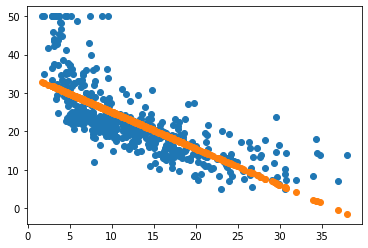

In [6]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

lstat = boston3['LSTAT']
lstat = lstat.values.reshape(-1, 1)
lstat = sm.add_constant(lstat)
y = load_boston().target
lin_model = sm.OLS(y, lstat).fit()
lin_model.summary()
y_hat = lin_model.predict(lstat)

fig, ax = plt.subplots()
lstat[:,1]
ax.scatter(lstat[:,1], y)
ax.scatter(lstat[:,1], y_hat)
plt.show()

# 3.4 Multi-feature plotting

Make a single matplotlib `figure` object with the same chart as in **3.3** but with 4 charts instead for your 4 most important features. 

Do not copy-paste code for each feature you visualize in the plot. Extract your code into a function so you can just have something like

```python
fix, ax1, ax2, ax3, ax4 = plt.subplots((2,2))
reg_plot_on_ax(feature_1, ax1)
reg_plot_on_ax(feature_2, ax2)
reg_plot_on_ax(feature_3, ax3)
reg_plot_on_ax(feature_4, ax4)
```

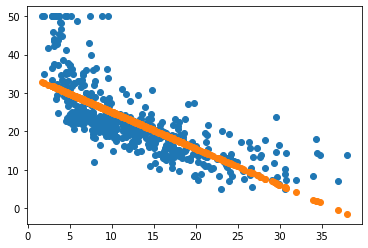

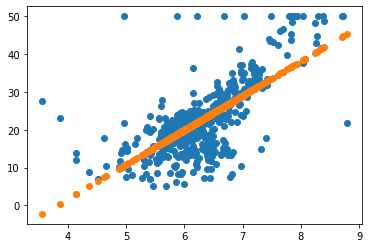

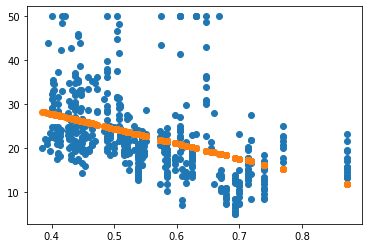

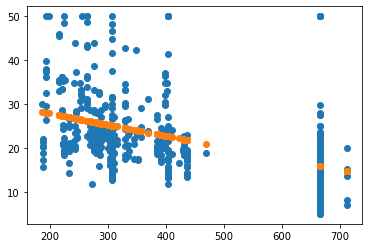

In [8]:
columns = ['LSTAT', 'RM', 'NOX', 'TAX']

for col in columns:
    x = boston3[col]
    x = x.values.reshape(-1, 1)
    x = sm.add_constant(x)
    y = load_boston().target
    model = sm.OLS(y, x).fit()
    y_hat = model.predict(x)

    fig, ax = plt.subplots()
    plt.scatter(x[:,1], y)
    plt.scatter(x[:,1], y_hat)
    plt.show()